In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grid = np.zeros((5, 5))
directions = ["north", "south", "west", "east"]
def step(x_pos, y_pos, step):
    x_new, y_new = x_pos, y_pos
    reward = 0
    if step == "north":
        if y_pos == 0:
            reward = -1
        else:
            y_new = y_pos-1 
    elif step == "south":
        if y_pos == 4:
            reward = -1
        else:
            y_new = y_pos+1 
    elif step == "west":
        if x_pos == 0:
            reward = -1
        else:
            x_new = x_pos-1 
    elif step == "east":
        if x_pos == 4:
            reward = -1
        else:
            x_new = x_pos+1 

    if x_new == 0 and y_new == 1:
        reward = 10
        x_new, y_new = 4, 1
    if x_new == 0 and y_new == 3:
        reward = 5 
        x_new, y_new = 2, 3
    return x_new, y_new, reward

In [3]:
possible_steps = ["north", "south", "west", "east"]

In [4]:
def iteration(grid):
    new_grid = np.zeros(grid.shape)
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            sum = 0
            for direction in directions:
                new_x, new_y, reward = step(x,y, direction)
                sum = sum + reward + 0.9 * grid[new_x,new_y]
            new_grid[x,y] = 0.25*sum
    change = np.sum(np.abs(new_grid-grid))
    return new_grid, change

In [5]:
iterations = 100
grid = np.zeros((5,5))
changes = np.zeros((iterations))
for i in range(iterations):
    grid, change = iteration(grid)
    changes[i] = change
print(grid)

[[ 3.88783119  5.0057808   5.06947184  3.4582655   1.9257028 ]
 [ 1.87919122  3.44399328  2.62360208  2.27248809  0.82708958]
 [ 0.25205505  0.95722513  0.87449913  0.54684924 -0.23821703]
 [-0.85711697 -0.31621491 -0.24101501 -0.47833048 -1.08335438]
 [-1.77702216 -1.26449412 -1.15113291 -1.34839447 -1.9038967 ]]


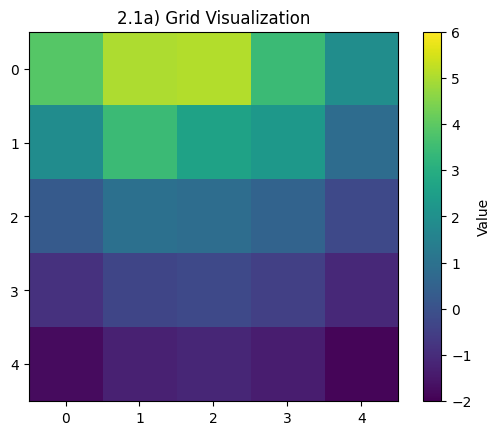

In [6]:
plt.imshow(grid, vmin=-2, vmax=6)
plt.colorbar(label="Value")
plt.title("2.1a) Grid Visualization")
plt.show()

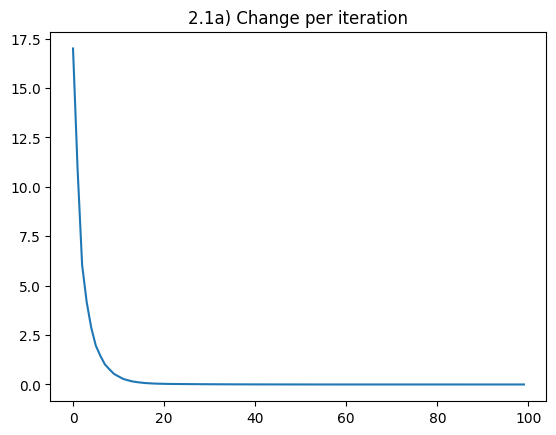

In [7]:
plt.plot(changes)
plt.title("2.1a) Change per iteration")
plt.show()

In [8]:
# 1b

In [9]:
def iteration3d(grid_3d):
    new_grid = np.zeros(grid_3d.shape)
    for x in range(grid_3d.shape[0]):
        for y in range(grid.shape[1]):
            for action in range(len(directions)):
                match action:
                    case 0: direction = "north"
                    case 1: direction = "south"
                    case 2: direction = "west"
                    case 3: direction = "east"
                new_x, new_y, reward = step(x, y, direction)
                new_grid[x,y,action] = reward + 0.9 * np.max(grid_3d[new_x, new_y, :])
    change = np.sum(np.abs(new_grid-grid_3d))
    return new_grid, change

In [10]:
iterations = 100
grid = np.zeros((5,5,4))
changes = np.zeros((iterations))
for i in range(iterations):
    grid, change = iteration3d(grid)
    changes[i] = change
    #print(grid.transpose(2, 0, 1))
#print(grid.transpose(2,0,1))

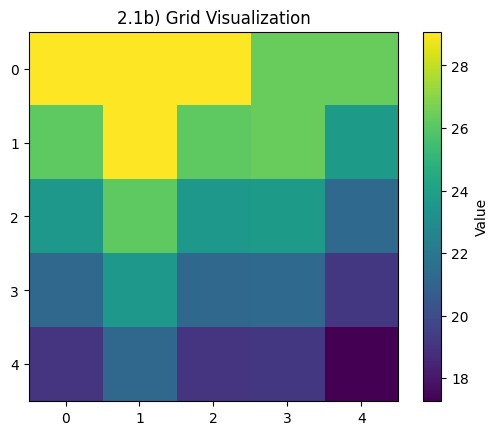

In [11]:
max_values = np.max(grid, axis=2)

plt.imshow(max_values, vmin=np.min(max_values), vmax=np.max(max_values))
plt.colorbar(label="Value")
plt.title("2.1b) Grid Visualization")
plt.show()

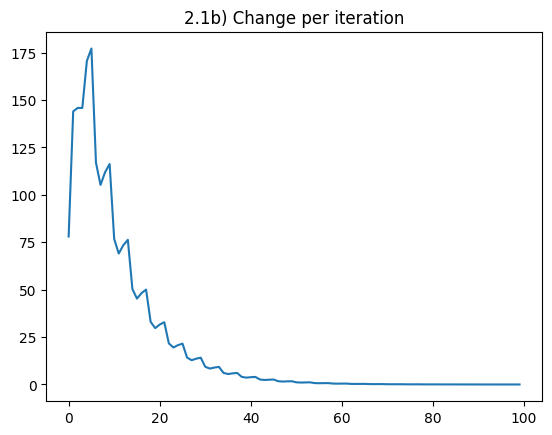

In [12]:
plt.plot(changes)
plt.title("2.1b) Change per iteration")
#plt.savefig("change.pdf")
plt.show()